In [6]:
import shap
import xgboost
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer


In [7]:
def get_num_items(item):
    if not pd.isna(item):
        return len(item.split(","))
    else:
        item

In [8]:
def get_year(item):
    if not pd.isna(item):
        return int(str(item).split("-")[0])
    else:
        item

In [9]:
df_raw = pd.read_csv("./train.csv")

In [10]:
df_raw['num_amenities'] = df_raw['property_amenities'].apply(get_num_items)
df_raw['n_verified_channels'] = df_raw['host_verified'].apply(get_num_items)
df_raw['host_since'] = df_raw['host_since'].apply(get_year)

In [11]:
features = ['property_id',
            'property_type', 
            'property_room_type', 
            'property_max_guests',
            'property_bathrooms',
            'property_bedrooms',
            'property_beds',
            'property_bed_type',
            'num_amenities',
            'host_since',
            'host_response_time',
            'host_response_rate',
            'n_verified_channels',
            'booking_price_covers',
            'booking_min_nights',
            'booking_max_nights',
            'booking_availability_30',
            'booking_availability_60',
            'booking_availability_90',
            'booking_availability_365',
            'booking_cancel_policy',
            'reviews_num',
            'reviews_rating',
            'reviews_acc',
            'reviews_cleanliness', 
            'reviews_checkin',
            'reviews_communication',
            'reviews_location', 
            'reviews_value', 
            'reviews_per_month',
            'target']

In [12]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df = df_raw[features]

In [13]:
df.set_index("property_id", drop=True, inplace=True)

### Split validation

In [14]:
X_train, X_validation = train_test_split(df, test_size=0.33, random_state=1982)

In [15]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train.select_dtypes(include=numerics))
X_scaled = scaler.transform(X_train.select_dtypes(include=numerics))

In [16]:
scaled_df = pd.DataFrame(X_scaled)
scaled_df.columns = X_train.select_dtypes(include=numerics).columns

In [17]:
scaled_df

,property_max_guests,property_bathrooms,property_bedrooms,property_beds,num_amenities,host_since,host_response_rate,n_verified_channels,booking_price_covers,booking_min_nights,...,reviews_num,reviews_rating,reviews_acc,reviews_cleanliness,reviews_checkin,reviews_communication,reviews_location,reviews_value,reviews_per_month,target
0,-0.574347,0.778563,-0.289322,-0.574783,-0.341814,1.203675,0.418629,1.533638,-0.455843,-0.083457,...,-0.428060,-1.311709,-0.542828,-0.196329,-0.752768,-0.774993,0.854183,-0.274969,-0.640807,-0.881683
1,1.686154,0.778563,1.046293,1.726116,0.048056,1.203675,0.266108,0.761406,1.641856,-0.137469,...,0.446053,-0.638137,-0.542828,-1.123199,-0.752768,-0.774993,-0.271530,-0.274969,2.284884,0.038136
2,-0.574347,-0.320287,-0.289322,-0.574783,1.412603,1.203675,0.418629,0.761406,-0.455843,0.780732,...,-0.510008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.555914
3,-0.574347,-0.320287,-0.289322,-0.574783,-1.511426,0.517978,-1.106581,-0.783059,-0.455843,-0.137469,...,0.446053,0.147696,0.608912,-0.196329,0.488754,-0.774993,-0.271530,-0.274969,-0.071646,-0.345122
4,-0.009222,-0.320287,-0.289322,-0.574783,1.217668,-0.167720,0.418629,-0.010827,0.593006,0.078578,...,-0.291480,0.147696,-0.542828,-0.196329,0.488754,0.469582,-0.271530,0.820730,-0.196462,-0.728380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4346,-0.574347,-0.320287,-0.289322,-0.574783,0.827797,0.517978,NaN,-0.783059,-0.455843,-0.137469,...,-0.510008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.325580
4347,-0.574347,-0.320287,-0.289322,-0.574783,-0.341814,0.517978,0.418629,-0.783059,-0.455843,-0.137469,...,-0.264164,0.147696,0.608912,0.730540,0.488754,0.469582,0.854183,0.820730,-0.451087,-0.153493
4348,0.555904,-0.320287,-1.624936,1.726116,0.827797,0.517978,0.418629,1.533638,-0.455843,-0.083457,...,0.555317,0.259958,0.608912,0.730540,0.488754,0.469582,0.854183,-0.274969,0.197957,0.076462
4349,1.686154,1.877414,1.046293,0.192183,0.827797,0.517978,0.418629,0.761406,2.690705,-0.029445,...,0.528001,-0.750399,-0.542828,-0.196329,-0.752768,-0.774993,-1.397244,-0.274969,0.292818,-0.594240


In [18]:
scaled_df.isnull().sum()

property_max_guests           0
property_bathrooms           11
property_bedrooms             7
property_beds                 9
num_amenities                35
host_since                    1
host_response_rate          982
n_verified_channels           0
booking_price_covers          0
booking_min_nights            0
booking_max_nights            0
booking_availability_30       0
booking_availability_60       0
booking_availability_90       0
booking_availability_365      0
reviews_num                   0
reviews_rating              923
reviews_acc                 935
reviews_cleanliness         933
reviews_checkin             937
reviews_communication       932
reviews_location            939
reviews_value               940
reviews_per_month           859
target                        0
dtype: int64

In [19]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [20]:
corrr = scaled_df.corr()
corrr.style.background_gradient(cmap='coolwarm')

,property_max_guests,property_bathrooms,property_bedrooms,property_beds,num_amenities,host_since,host_response_rate,n_verified_channels,booking_price_covers,booking_min_nights,booking_max_nights,booking_availability_30,booking_availability_60,booking_availability_90,booking_availability_365,reviews_num,reviews_rating,reviews_acc,reviews_cleanliness,reviews_checkin,reviews_communication,reviews_location,reviews_value,reviews_per_month,target
property_max_guests,1.000000,0.359274,0.636525,0.812580,0.229631,-0.073660,0.054266,0.072618,0.526271,-0.018939,0.013869,0.046141,0.042619,0.042482,0.096390,0.058145,-0.014033,-0.037812,-0.020804,-0.030909,-0.015645,0.002113,-0.040316,-0.005285,0.030719
property_bathrooms,0.359274,1.000000,0.412767,0.327306,0.112273,-0.034753,-0.034107,0.033049,0.252512,-0.011063,-0.006932,0.039432,0.016084,0.011457,0.013289,-0.045396,0.033491,-0.005392,0.002964,-0.032792,-0.021777,-0.005639,0.011274,-0.048564,-0.002887
property_bedrooms,0.636525,0.412767,1.000000,0.608635,0.155866,-0.045755,-0.025529,0.049450,0.379192,0.008953,0.026793,0.006880,-0.013249,-0.014271,-0.006378,-0.056482,0.040697,0.009068,0.002822,0.013492,0.020671,-0.022458,0.017369,-0.076882,0.018820
property_beds,0.812580,0.327306,0.608635,1.000000,0.166529,-0.060281,0.006210,0.028068,0.429069,-0.009828,0.042439,0.057493,0.052519,0.052565,0.091652,0.049144,-0.014390,-0.053094,-0.003639,-0.024507,-0.006433,-0.016722,-0.031400,-0.022088,0.024453
num_amenities,0.229631,0.112273,0.155866,0.166529,1.000000,0.025668,0.144695,0.093209,0.166586,-0.011950,-0.018355,0.097183,0.115804,0.123469,0.149715,0.104067,0.156184,0.142046,0.177846,0.099978,0.113850,0.102660,0.115527,0.142056,-0.013827
host_since,-0.073660,-0.034753,-0.045755,-0.060281,0.025668,1.000000,0.022862,-0.170099,-0.098287,-0.021527,-0.003495,0.025463,0.013392,0.001294,-0.113140,-0.143170,-0.008280,0.004452,-0.010080,0.007828,0.011127,0.006748,0.011109,0.163531,0.022130
host_response_rate,0.054266,-0.034107,-0.025529,0.006210,0.144695,0.022862,1.000000,0.129303,0.030250,0.014870,0.005545,-0.171147,-0.149295,-0.147209,-0.099059,0.125536,0.066214,0.070104,0.122298,0.027717,0.029375,0.025224,0.037699,0.180951,0.003274
n_verified_channels,0.072618,0.033049,0.049450,0.028068,0.093209,-0.170099,0.129303,1.000000,0.033971,-0.001795,-0.000774,-0.005801,0.011815,0.022316,0.038619,0.075084,0.074019,0.076627,0.037182,0.018198,0.067939,0.026366,0.033253,0.077744,-0.008100
booking_price_covers,0.526271,0.252512,0.379192,0.429069,0.166586,-0.098287,0.030250,0.033971,1.000000,-0.017367,0.027860,0.039600,0.041575,0.044004,0.109559,0.082914,-0.009899,-0.013766,-0.004884,-0.013317,-0.016093,-0.001611,-0.027222,-0.006847,0.014899
booking_min_nights,-0.018939,-0.011063,0.008953,-0.009828,-0.011950,-0.021527,0.014870,-0.001795,-0.017367,1.000000,-0.002180,-0.016733,-0.019655,-0.018204,-0.004795,-0.037735,-0.002756,-0.007588,0.012282,0.002825,0.004952,-0.005126,-0.035283,-0.093980,0.009364


In [21]:
random_state = 1981
imp = IterativeImputer(max_iter=10, random_state=random_state, sample_posterior=True)
imp.fit(X_scaled)
X_scaled_imputed = imp.transform(X_scaled)

In [22]:
scaled_df_imputed = pd.DataFrame(X_scaled_imputed)
scaled_df_imputed.columns = X_train.select_dtypes(include=numerics).columns

In [23]:
scaled_df_imputed.corr().style.background_gradient(cmap='coolwarm')

,property_max_guests,property_bathrooms,property_bedrooms,property_beds,num_amenities,host_since,host_response_rate,n_verified_channels,booking_price_covers,booking_min_nights,booking_max_nights,booking_availability_30,booking_availability_60,booking_availability_90,booking_availability_365,reviews_num,reviews_rating,reviews_acc,reviews_cleanliness,reviews_checkin,reviews_communication,reviews_location,reviews_value,reviews_per_month,target
property_max_guests,1.000000,0.359034,0.636195,0.812463,0.227871,-0.074116,0.049583,0.072618,0.526271,-0.018939,0.013869,0.046141,0.042619,0.042482,0.096390,0.058145,-0.010182,-0.030631,-0.013603,-0.026255,-0.016159,0.008734,-0.035551,-0.001272,0.030719
property_bathrooms,0.359034,1.000000,0.412975,0.327640,0.112939,-0.034572,-0.034420,0.032594,0.252505,-0.010754,-0.006899,0.040338,0.017174,0.012602,0.014737,-0.047378,0.029555,-0.015253,-0.006505,-0.040047,-0.046856,-0.017219,0.005357,-0.050885,-0.002843
property_bedrooms,0.636195,0.412975,1.000000,0.607478,0.155499,-0.045307,-0.023351,0.049307,0.379186,0.009017,0.026803,0.006749,-0.013219,-0.014299,-0.007108,-0.056974,0.050761,0.019949,0.014266,0.024354,0.018435,-0.021294,0.024840,-0.068731,0.019187
property_beds,0.812463,0.327640,0.607478,1.000000,0.166191,-0.060390,0.007108,0.029812,0.429190,-0.009788,0.042435,0.055153,0.050529,0.050755,0.090857,0.049555,-0.019610,-0.052307,-0.004803,-0.019501,-0.010755,-0.013456,-0.031643,-0.025411,0.023535
num_amenities,0.227871,0.112939,0.155499,0.166191,1.000000,0.023770,0.128050,0.095193,0.166525,-0.011678,-0.018278,0.095429,0.114903,0.122854,0.149639,0.104724,0.153009,0.141664,0.173882,0.089531,0.107887,0.105527,0.111412,0.146789,-0.013317
host_since,-0.074116,-0.034572,-0.045307,-0.060390,0.023770,1.000000,0.006036,-0.170938,-0.098442,-0.021578,-0.003504,0.025062,0.012936,0.000789,-0.113600,-0.143318,-0.013837,-0.006292,-0.017294,0.003147,0.006103,0.009896,0.007716,0.164652,0.021886
host_response_rate,0.049583,-0.034420,-0.023351,0.007108,0.128050,0.006036,1.000000,0.126228,0.027365,0.016423,0.005233,-0.141078,-0.115208,-0.106973,-0.067693,0.113978,0.090002,0.095153,0.141456,0.025608,0.033905,0.052205,0.059853,0.185130,0.004108
n_verified_channels,0.072618,0.032594,0.049307,0.029812,0.095193,-0.170938,0.126228,1.000000,0.033971,-0.001795,-0.000774,-0.005801,0.011815,0.022316,0.038619,0.075084,0.097450,0.101605,0.063784,0.029827,0.085997,0.042188,0.053844,0.114032,-0.008100
booking_price_covers,0.526271,0.252505,0.379186,0.429190,0.166525,-0.098442,0.027365,0.033971,1.000000,-0.017367,0.027860,0.039600,0.041575,0.044004,0.109559,0.082914,-0.011505,-0.013487,-0.006239,-0.011173,-0.013549,0.001469,-0.023787,0.015486,0.014899
booking_min_nights,-0.018939,-0.010754,0.009017,-0.009788,-0.011678,-0.021578,0.016423,-0.001795,-0.017367,1.000000,-0.002180,-0.016733,-0.019655,-0.018204,-0.004795,-0.037735,-0.017049,-0.014253,0.047966,0.005987,-0.000186,-0.002689,-0.095991,-0.097680,0.009364


<Axes: >

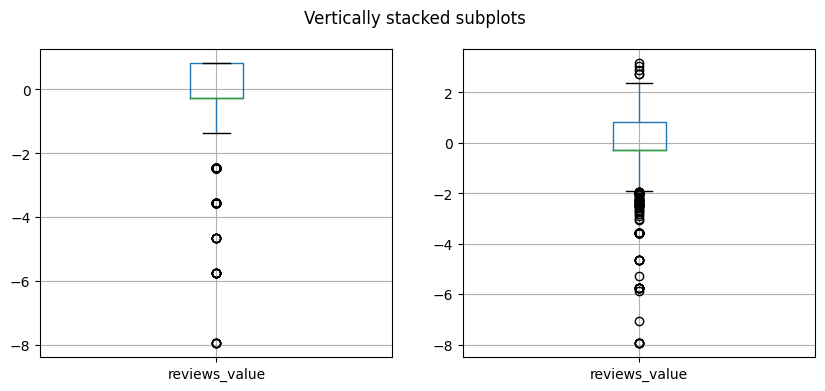

In [24]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4)) 
fig.suptitle('Vertically stacked subplots')
scaled_df.boxplot(column=["reviews_value"], ax=ax1)
scaled_df_imputed.boxplot(column=["reviews_value"], ax=ax2)

<Axes: >

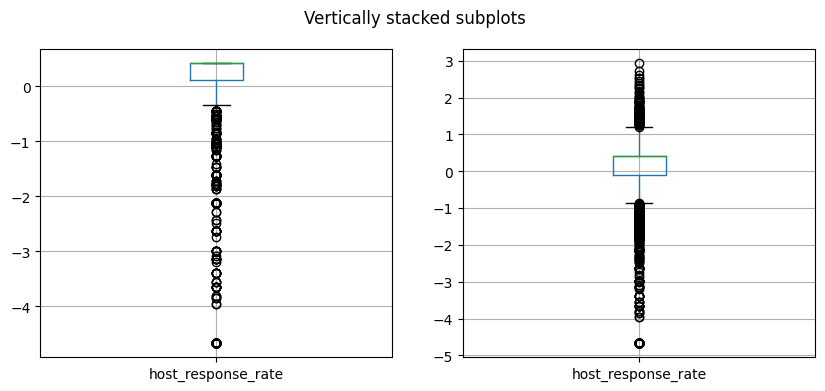

In [25]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4)) 
fig.suptitle('Vertically stacked subplots')
scaled_df.boxplot(column=["host_response_rate"], ax=ax1)
scaled_df_imputed.boxplot(column=["host_response_rate"], ax=ax2)

In [26]:
non_numeric_cols = [col for col in X_train.columns if col not in scaled_df_imputed.columns]

In [27]:
df1 = X_train[non_numeric_cols]
df2 = scaled_df_imputed

In [28]:
df2 = scaled_df_imputed

In [29]:
df1 = df1.reset_index()
df2["property_id"] = list(X_train.index)

In [30]:
joined = pd.merge(df1, df2, on='property_id')

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
for col in non_numeric_cols:
    joined[col] = pd.Categorical(joined[col])


In [69]:
joined = joined.dropna()

In [70]:
X = joined.loc[:, joined.columns != 'target'].drop(columns = "property_id")
y = joined.target

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
# train an XGBoost model
model = LinearRegression().fit(X, y)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])


ValueError: could not convert string to float: 'Apartment'